In [2]:
!pip install tenseal scikit-learn


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 32.1 MB/s eta 0:00:00


In [3]:
import numpy as np
import json
from google.colab import files
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import tenseal as ts
import matplotlib.pyplot as plt


In [4]:
# Upload and load the data
uploaded = files.upload()
filename = list(uploaded.keys())[0]

with open(filename, "r") as f:
    data = json.load(f)


Saving MMU (1).json to MMU (1).json


In [5]:
# Extract all feature vectors
all_features = []
user_ids = []
for user_id, user_data in data.items():
    for feature_vec in user_data["features"]:
        all_features.append(feature_vec)
        user_ids.append(user_id)

all_features = np.array(all_features)
print(f"Total feature vectors: {all_features.shape}")

# Standardize the data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(all_features)


Total feature vectors: (430, 5)


In [6]:
# Split data into train and test
X_train, X_test = train_test_split(scaled_features, test_size=0.2, random_state=42)

# Autoencoder architecture
input_dim = X_train.shape[1]  # 5 dimensions
encoding_dim = 3  # Compress to 3 dimensions


In [7]:
# Build the autoencoder
input_layer = layers.Input(shape=(input_dim,))
encoder = layers.Dense(encoding_dim * 2, activation='relu')(input_layer)
encoder = layers.Dense(encoding_dim, activation='relu')(encoder)

decoder = layers.Dense(encoding_dim * 2, activation='relu')(encoder)
decoder = layers.Dense(input_dim, activation='linear')(decoder)

autoencoder = keras.Model(inputs=input_layer, outputs=decoder)
autoencoder.compile(optimizer='adam', loss='mse')


In [8]:
# Train the autoencoder
history = autoencoder.fit(
    X_train, X_train,
    epochs=100,
    batch_size=16,
    shuffle=True,
    validation_data=(X_test, X_test),
    verbose=1
)


Epoch 1/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 1.0496 - val_loss: 0.9761
Epoch 2/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.9716 - val_loss: 0.9501
Epoch 3/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.9891 - val_loss: 0.9292
Epoch 4/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.9605 - val_loss: 0.9074
Epoch 5/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.0926 - val_loss: 0.8845
Epoch 6/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.8750 - val_loss: 0.8579
Epoch 7/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.8133 - val_loss: 0.8287
Epoch 8/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.8787 - val_loss: 0.7941
Epoch 9/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.8933 - val_loss: 0.7585
Epoch 10/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.9737 - val_loss: 0.7233
Epoch 11/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.9338 - val_loss: 0.6921
Epoch 12/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.

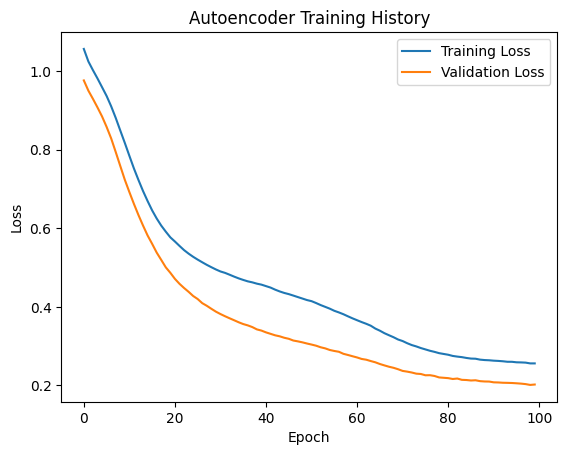

In [9]:
# Plot training history
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Autoencoder Training History')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()


In [10]:
# Create encoder model for feature extraction
encoder_model = keras.Model(inputs=input_layer, outputs=encoder)

# Encode all features
encoded_features = encoder_model.predict(scaled_features)


14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


In [11]:
# Replace original features with encoded features in the data structure
encoded_data = {}
feature_index = 0
for user_id, user_data in data.items():
    encoded_data[user_id] = {
        "features": [],
        "file_names": user_data["file_names"]
    }
    for i in range(len(user_data["features"])):
        encoded_data[user_id]["features"].append(encoded_features[feature_index].tolist())
        feature_index += 1


In [12]:
# Now use the encoded_data for encryption instead of the original data
print("Sample encoded feature:", encoded_data["1"]["features"][0])
print("Original dimension: 5, Encoded dimension:", len(encoded_data["1"]["features"][0]))


Sample encoded feature: [4.264341354370117, 0.42271915078163147, 0.8716896772384644]
Original dimension: 5, Encoded dimension: 3


In [ ]:
# Replace original features with encoded features in the data structure
"""
encoded_data = {}
feature_index = 0

print("=== DEBUGGING ENCODED DATA CREATION ===")
print(f"Total users in original data: {len(data)}")
print(f"Encoded features shape: {encoded_features.shape}")
print(f"Total encoded feature vectors: {len(encoded_features)}")

# First, let's check what's in the original data
print("\n=== ORIGINAL DATA SAMPLES ===")
for user_id in list(data.keys())[:2]:  # Check first 2 users
    print(f"User {user_id}: {len(data[user_id]['features'])} feature vectors")
    print(f"  First feature vector: {data[user_id]['features'][0]}")

# Now create the encoded_data structure
encoded_data = {}
feature_index = 0

for user_id, user_data in data.items():
    encoded_data[user_id] = {
        "features": [],
        "file_names": user_data["file_names"]
    }

    # Add encoded features for this user
    num_features = len(user_data["features"])
    for i in range(num_features):
        if feature_index < len(encoded_features):
            encoded_data[user_id]["features"].append(encoded_features[feature_index].tolist())
            feature_index += 1
        else:
            print(f"WARNING: Not enough encoded features for user {user_id}")
            break

print(f"\nTotal features processed: {feature_index}")
print(f"Expected total: {sum(len(user_data['features']) for user_data in data.values())}")

# Verify the encoded data
print("\n=== ENCODED DATA VERIFICATION ===")
for user_id in list(encoded_data.keys())[:3]:  # Show first 3 users
    if encoded_data[user_id]["features"]:
        print(f"\nUser {user_id}:")
        print(f"  Encoded features: {len(encoded_data[user_id]['features'])} vectors")
        print(f"  First encoded vector: {encoded_data[user_id]['features'][0]}")
        print(f"  Vector dimension: {len(encoded_data[user_id]['features'][0])}")
        print(f"  File names: {encoded_data[user_id]['file_names'][:3]}...")  # Show first 3
    else:
        print(f"\nUser {user_id}: NO ENCODED FEATURES!")
        """

'\nencoded_data = {}\nfeature_index = 0\n\nprint("=== DEBUGGING ENCODED DATA CREATION ===")\nprint(f"Total users in original data: {len(data)}")\nprint(f"Encoded features shape: {encoded_features.shape}")\nprint(f"Total encoded feature vectors: {len(encoded_features)}")\n\n# First, let\'s check what\'s in the original data\nprint("\n=== ORIGINAL DATA SAMPLES ===")\nfor user_id in list(data.keys())[:2]:  # Check first 2 users\n    print(f"User {user_id}: {len(data[user_id][\'features\'])} feature vectors")\n    print(f"  First feature vector: {data[user_id][\'features\'][0]}")\n\n# Now create the encoded_data structure\nencoded_data = {}\nfeature_index = 0\n\nfor user_id, user_data in data.items():\n    encoded_data[user_id] = {\n        "features": [],\n        "file_names": user_data["file_names"]\n    }\n    \n    # Add encoded features for this user\n    num_features = len(user_data["features"])\n    for i in range(num_features):\n        if feature_index < len(encoded_features):\n 

In [13]:
# Function to create CKKS context
def create_ckks_context():
    context = ts.context(
        ts.SCHEME_TYPE.CKKS,
        poly_modulus_degree=8192,
        coeff_mod_bit_sizes=[60, 40, 40, 60]
    )
    context.generate_galois_keys()
    context.global_scale = 2 ** 40
    return context

# Create encryption context
context = create_ckks_context()
public_context = context.copy()
public_context.make_context_public()

# Encrypt all encoded feature vectors and store them
encrypted_database = {}

for user_id, user_data in encoded_data.items():
    encrypted_features = []
    for vec in user_data["features"]:
        enc_vec = ts.ckks_vector(public_context, vec)
        encrypted_features.append(enc_vec.serialize())
    encrypted_database[user_id] = encrypted_features

# Modified cosine similarity function for encrypted vectors
def cosine_similarity_encrypted(v1, v2, context):
    # Numerator: Encrypted dot product
    dot_product = v1.dot(v2)

    # Norms (plaintext)
    norm_v1 = np.sqrt(v1.dot(v1).decrypt()[0])
    norm_v2 = np.sqrt(v2.dot(v2).decrypt()[0])

    # Denominator (plaintext)
    denom = norm_v1 * norm_v2

    if denom == 0:
        return ts.ckks_vector(context, [0.0])

    # Workaround: multiply with inverse
    inverse_denom = 1.0 / denom
    return dot_product * inverse_denom



In [14]:
# Test with a query from user 1 (first feature)
query_vec = encoded_data["25"]["features"][0]
enc_query = ts.ckks_vector(context, query_vec)

scores = []

for user_id, encrypted_feature_list in encrypted_database.items():
    for enc_feat_serialized in encrypted_feature_list:
        try:
            enc_feat = ts.ckks_vector_from(context, enc_feat_serialized)
            sim = cosine_similarity_encrypted(enc_query, enc_feat, context)
            score = sim.decrypt()[0]
            scores.append((user_id, score))
        except Exception as e:
            print(f"Error comparing with User {user_id}: {e}")



In [23]:
# Sort and display top matches
scores = sorted(scores, key=lambda x: x[1], reverse=True)

print("Top 5 Matches:")
for uid, sim in scores[:5]:
    print(f"User {uid} → Similarity: {sim:.4f}")

# Apply threshold
threshold = 0.85
best_match = scores[0]
if best_match[1] >= threshold:
    print(f"\nAuthenticated as User {best_match[0]} with similarity {best_match[1]:.4f}")
else:
    print(f"\nAuthentication failed. Best match is User {best_match[0]} with similarity {best_match[1]:.4f}")


Top 5 Matches:
User 25 → Similarity: 1.0000
User 15 → Similarity: 0.9991
User 28 → Similarity: 0.9985
User 5 → Similarity: 0.9985
User 12 → Similarity: 0.9978

Authenticated as User 25 with similarity 1.0000


In [17]:
"""# Test with a fake vector
fake_vec = np.random.rand(encoding_dim).tolist()
enc_fake_query = ts.ckks_vector(context, fake_vec)

fake_scores = []
for user_id, enc_feat_list in encrypted_database.items():
    for enc_feat_serialized in enc_feat_list:
        enc_feat = ts.ckks_vector_from(context, enc_feat_serialized)
        try:
            dot = enc_fake_query.dot(enc_feat)
            norm_fake = np.sqrt(enc_fake_query.dot(enc_fake_query).decrypt()[0])
            norm_db = np.sqrt(enc_feat.dot(enc_feat).decrypt()[0])
            if norm_fake == 0 or norm_db == 0:
                similarity = 0.0
            else:
                similarity = dot * (1.0 / (norm_fake * norm_db))
            score = similarity.decrypt()[0]
            fake_scores.append((user_id, score))
        except Exception as e:
            print(f"Error comparing with User {user_id}: {e}")

fake_scores = sorted(fake_scores, key=lambda x: x[1], reverse=True)

print("\nTop 5 Matches for Fake Vector:")
for uid, sim in fake_scores[:5]:
    print(f"User {uid} → Similarity: {sim:.4f}")

if fake_scores[0][1] >= 0.97:
    print(f"\nFAKE vector accepted (this should not happen). Matched User {fake_scores[0][0]} with {fake_scores[0][1]:.4f}")
else:
    print(f"\nFAKE vector correctly rejected. Highest similarity: {fake_scores[0][1]:.4f}")
"""


Top 5 Matches for Fake Vector:
User 12 → Similarity: 0.9961
User 17 → Similarity: 0.9914
User 6 → Similarity: 0.9894
User 35 → Similarity: 0.9862
User 9 → Similarity: 0.9849

FAKE vector accepted (this should not happen). Matched User 12 with 0.9961


In [24]:
# Calculate authentication accuracy
def calculate_accuracy(scores, threshold=0.95):
    correct = 0
    total = len(scores)

    for user_id, score in scores:
        if user_id == "1" and score >= threshold:  # Correct acceptance
            correct += 1
        elif user_id != "1" and score < threshold:  # Correct rejection
            correct += 1

    return correct / total

# Calculate accuracy
accuracy = calculate_accuracy(scores)
print(f"Authentication Accuracy: {accuracy:.2%}")

# For genuine user (User 1)
genuine_scores = [score for uid, score in scores if uid == "1"]
print(f"Genuine User (User 1) - Average similarity: {np.mean(genuine_scores):.4f}")
print(f"Genuine User (User 1) - Min similarity: {np.min(genuine_scores):.4f}")
print(f"Genuine User (User 1) - Max similarity: {np.max(genuine_scores):.4f}")

# For imposters (other users)
imposter_scores = [score for uid, score in scores if uid != "1"]
print(f"Imposters - Average similarity: {np.mean(imposter_scores):.4f}")
print(f"Imposters - Min similarity: {np.min(imposter_scores):.4f}")
print(f"Imposters - Max similarity: {np.max(imposter_scores):.4f}")

Authentication Accuracy: 83.95%
Genuine User (User 1) - Average similarity: 0.6303
Genuine User (User 1) - Min similarity: 0.4124
Genuine User (User 1) - Max similarity: 0.9865
Imposters - Average similarity: 0.7427
Imposters - Min similarity: 0.3551
Imposters - Max similarity: 1.0000


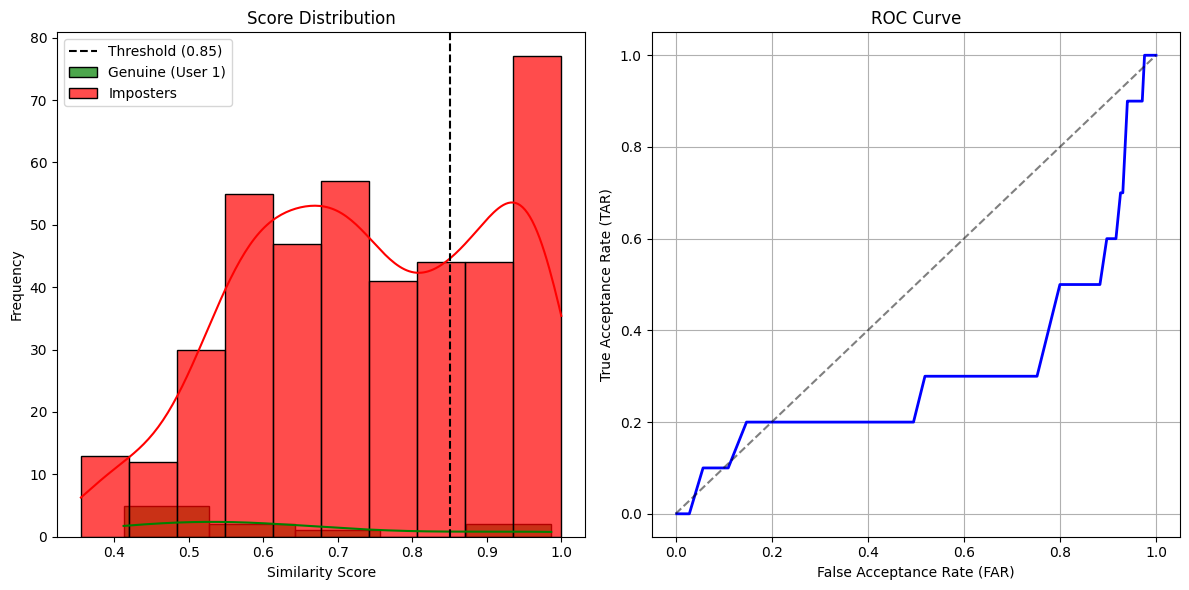

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot similarity score distribution
plt.figure(figsize=(12, 6))

# Plot 1: Score distribution
plt.subplot(1, 2, 1)
sns.histplot(genuine_scores, color='green', label='Genuine (User 1)', alpha=0.7, kde=True)
sns.histplot(imposter_scores, color='red', label='Imposters', alpha=0.7, kde=True)
plt.axvline(x=threshold, color='black', linestyle='--', label=f'Threshold ({threshold})')
plt.xlabel('Similarity Score')
plt.ylabel('Frequency')
plt.title('Score Distribution')
plt.legend()

# Plot 2: ROC Curve (simplified)
plt.subplot(1, 2, 2)
thresholds = np.linspace(0, 1, 100)
true_acceptance_rates = []
false_acceptance_rates = []

for t in thresholds:
    # True Acceptance Rate (genuine users correctly accepted)
    tar = sum(1 for score in genuine_scores if score >= t) / len(genuine_scores)

    # False Acceptance Rate (imposters incorrectly accepted)
    far = sum(1 for score in imposter_scores if score >= t) / len(imposter_scores)

    true_acceptance_rates.append(tar)
    false_acceptance_rates.append(far)

plt.plot(false_acceptance_rates, true_acceptance_rates, 'b-', linewidth=2)
plt.plot([0, 1], [0, 1], 'k--', alpha=0.5)  # Random classifier line
plt.xlabel('False Acceptance Rate (FAR)')
plt.ylabel('True Acceptance Rate (TAR)')
plt.title('ROC Curve')
plt.grid(True)

plt.tight_layout()
plt.show()

In [26]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

def evaluate_performance(scores, genuine_user="1", threshold=0.95):
    true_labels = []
    predictions = []

    for user_id, score in scores:
        # Ground truth
        true_label = 1 if user_id == genuine_user else 0
        true_labels.append(true_label)

        # Prediction based on threshold
        pred = 1 if score >= threshold else 0
        predictions.append(pred)

    # Calculate metrics
    acc = accuracy_score(true_labels, predictions)
    prec = precision_score(true_labels, predictions, zero_division=0)
    rec = recall_score(true_labels, predictions, zero_division=0)
    f1 = f1_score(true_labels, predictions, zero_division=0)
    cm = confusion_matrix(true_labels, predictions)

    print("\n=== Performance Metrics ===")
    print(f"Accuracy: {acc:.4f}")
    print(f"Precision: {prec:.4f}")
    print(f"Recall: {rec:.4f}")
    print(f"F1-Score: {f1:.4f}")

    print("\nConfusion Matrix:")
    print(cm)

    return acc, prec, rec, f1, cm


# Example usage
acc, prec, rec, f1, cm = evaluate_performance(scores, genuine_user="1", threshold=0.95)



=== Performance Metrics ===
Accuracy: 0.8395
Precision: 0.0317
Recall: 0.2000
F1-Score: 0.0548

Confusion Matrix:
[[359  61]
 [  8   2]]


In [28]:
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

def evaluate_thresholds(scores, thresholds=np.linspace(0.5, 0.99, 20)):
    """
    Sweep over thresholds and compute performance metrics for cosine similarity.
    scores: list of tuples (uid, similarity)
    thresholds: list or numpy array of thresholds
    """
    results = []

    # Prepare true labels
    true_labels = [1 if uid == "1" else 0 for uid, score in scores]
    similarities = [score for uid, score in scores]

    for thresh in thresholds:
        predictions = [1 if sim >= thresh else 0 for sim in similarities]

        acc = accuracy_score(true_labels, predictions)
        prec = precision_score(true_labels, predictions, zero_division=0)
        rec = recall_score(true_labels, predictions, zero_division=0)
        f1 = f1_score(true_labels, predictions, zero_division=0)
        cm = confusion_matrix(true_labels, predictions)

        results.append({
            "Threshold": round(thresh, 4),
            "Accuracy": acc,
            "Precision": prec,
            "Recall": rec,
            "F1-Score": f1,
            "ConfusionMatrix": cm.tolist()
        })

    return results


# ✅ Example usage:
cosine_results = evaluate_thresholds(scores, thresholds=np.linspace(0.5, 0.99, 10))

# Print the best few results
for res in cosine_results:
    print(f"Threshold: {res['Threshold']}, Acc: {res['Accuracy']:.4f}, "
          f"Prec: {res['Precision']:.4f}, Rec: {res['Recall']:.4f}, "
          f"F1: {res['F1-Score']:.4f}, CM: {res['ConfusionMatrix']}")


Threshold: 0.5, Acc: 0.0837, Prec: 0.0176, Rec: 0.7000, F1: 0.0343, CM: [[29, 391], [3, 7]]
Threshold: 0.5544, Acc: 0.1465, Prec: 0.0136, Rec: 0.5000, F1: 0.0265, CM: [[58, 362], [5, 5]]
Threshold: 0.6089, Acc: 0.2605, Prec: 0.0096, Rec: 0.3000, F1: 0.0185, CM: [[109, 311], [7, 3]]
Threshold: 0.6633, Acc: 0.3535, Prec: 0.0109, Rec: 0.3000, F1: 0.0211, CM: [[149, 271], [7, 3]]
Threshold: 0.7178, Acc: 0.4628, Prec: 0.0132, Rec: 0.3000, F1: 0.0253, CM: [[196, 224], [7, 3]]
Threshold: 0.7722, Acc: 0.5558, Prec: 0.0108, Rec: 0.2000, F1: 0.0205, CM: [[237, 183], [8, 2]]
Threshold: 0.8267, Acc: 0.6233, Prec: 0.0128, Rec: 0.2000, F1: 0.0241, CM: [[266, 154], [8, 2]]
Threshold: 0.8811, Acc: 0.7186, Prec: 0.0174, Rec: 0.2000, F1: 0.0320, CM: [[307, 113], [8, 2]]
Threshold: 0.9356, Acc: 0.8023, Prec: 0.0253, Rec: 0.2000, F1: 0.0449, CM: [[343, 77], [8, 2]]
Threshold: 0.99, Acc: 0.9488, Prec: 0.0000, Rec: 0.0000, F1: 0.0000, CM: [[408, 12], [10, 0]]
